In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# generate some sample data
dates = pd.date_range('20220101', periods=100)
data = np.sin(np.arange(100)*2*np.pi/12) + np.random.randn(100)*0.1
df = pd.DataFrame({'Date': dates, 'Data': data})

# split the data into training and testing sets
train_size = int(len(df) * 0.7)
train_data, test_data = df[:train_size], df[train_size:]

# prepare the input data for training
X_train = np.array(train_data['Data']).reshape(-1, 1)
y_train = np.array(train_data['Data'].shift(-1)).reshape(-1, 1)

# train a linear regression model on the input data
model = LinearRegression()

In [2]:
# prepare the input data for testing
X_test = np.array(test_data['Data']).reshape(-1, 1)
y_test = np.array(test_data['Data'].shift(-1)).reshape(-1, 1)

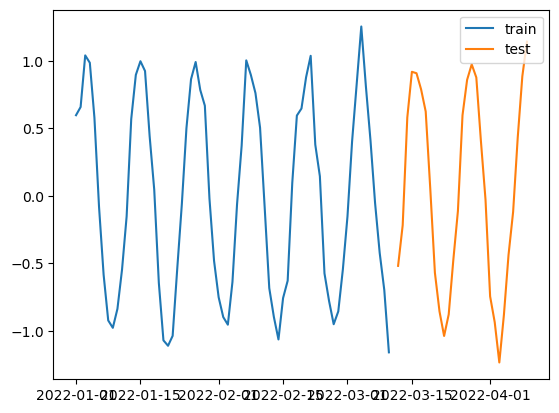

In [3]:
plt.plot(train_data['Date'], y_train, label='train')
plt.plot(test_data['Date'], y_test, label='test')
plt.legend()
plt.show()

In [4]:
import numpy as np
def fix(arr):
    mask = np.isnan(arr)
    for i in range(len(arr)):
        if mask[i]:
            if i == 0:
                arr[i] = np.nanmean(arr[i+1:i+3])
            elif i == len(arr)-1:
                arr[i] = np.nanmean(arr[i-2:i])
            else:
                arr[i] = np.nanmean(arr[i-1:i+2])

    return 

In [5]:
fix(X_train)
fix(y_train)

In [6]:
model.fit(X_train, y_train)

LinearRegression()

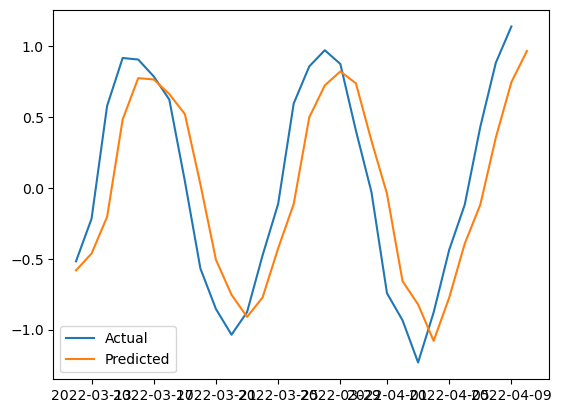

In [7]:
# use the trained model to make predictions on the test data
y_pred = model.predict(X_test)

# plot the actual and predicted values
plt.plot(test_data['Date'], y_test, label='Actual')
plt.plot(test_data['Date'], y_pred, label='Predicted')
plt.legend()
plt.show()


2023-03-11 09:45:48.087771: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 09:45:50.051170: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-11 09:45:51.407430: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10214 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:09:00.0, compute capability: 8.6
2023-03-11 09:45:

Epoch 1/50


2023-03-11 09:45:54.668263: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8401
2023-03-11 09:45:54.816599: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-03-11 09:45:54.867619: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f908c176f20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-11 09:45:54.867659: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2023-03-11 09:45:54.867670: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (1): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-03-11 09:45:54.873974: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-

4/4 [==============================] - 4s 161ms/step - loss: 0.3134 - val_loss: 0.3135
Epoch 2/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2701 - val_loss: 0.2683
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2354 - val_loss: 0.2270
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.2022 - val_loss: 0.1903
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1700 - val_loss: 0.1589
Epoch 6/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1443 - val_loss: 0.1320
Epoch 7/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1226 - val_loss: 0.1102
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1030 - val_loss: 0.0942
Epoch 9/50
4/4 [==============================] - 0s 14ms/step - loss: 0.0887 - val_loss: 0.0838
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 0.0773 - val_loss: 0.0791
Epoch 11/50
4/4 [======================

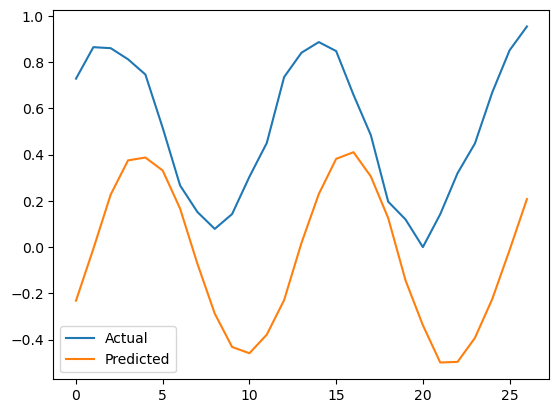

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df['Data'].values.reshape(-1, 1))

# split the data into training and testing sets
train_size = int(len(scaled_data) * 0.7)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# prepare the input and output data for training
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 3
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)

# build an LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(time_steps, 1)),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)

# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the actual and predicted values
plt.plot(test_data[time_steps:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [20]:
time_steps = 3
X_train, y_train = create_dataset(train_data, train_data, time_steps)
X_test, y_test = create_dataset(test_data, test_data, time_steps)

# build a dense neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 1)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)

Epoch 1/50
4/4 [==============================] - 2s 71ms/step - loss: 0.3149 - val_loss: 0.2747
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.2720 - val_loss: 0.2328
Epoch 3/50
4/4 [==============================] - 0s 16ms/step - loss: 0.2373 - val_loss: 0.1971
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.2086 - val_loss: 0.1639
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1769 - val_loss: 0.1352
Epoch 6/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1488 - val_loss: 0.1118
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.1276 - val_loss: 0.0934
Epoch 8/50
4/4 [==============================] - 0s 12ms/step - loss: 0.1106 - val_loss: 0.0819
Epoch 9/50
4/4 [==============================] - 0s 13ms/step - loss: 0.0967 - val_loss: 0.0784
Epoch 10/50
4/4 [==============================] - 0s 15ms/step - loss: 0.0901 - val_loss: 0.0810
Epoch 11/50
4/4 [============

In [21]:
y_pred.shape
y_pred=y_pred.squeeze()
y_pred.shape

(27, 3)

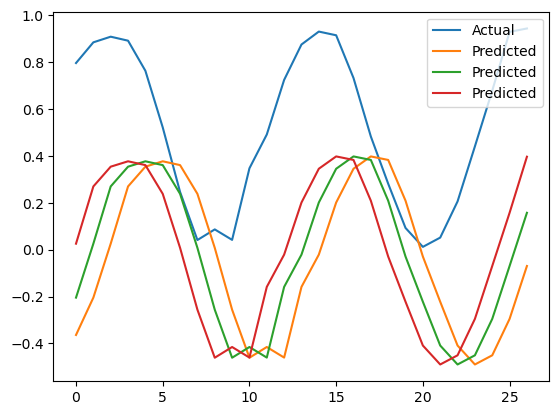

In [22]:
# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the actual and predicted values
plt.plot(test_data[time_steps:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


In [34]:
import tensorflow as tf


Epoch 1/50
4/4 [==============================] - 1s 66ms/step - loss: 1.9488 - val_loss: 2.5665
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 1.9326 - val_loss: 2.5458
Epoch 3/50
4/4 [==============================] - 0s 14ms/step - loss: 1.9166 - val_loss: 2.5252
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 1.9005 - val_loss: 2.5049
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 1.8851 - val_loss: 2.4844
Epoch 6/50
4/4 [==============================] - 0s 13ms/step - loss: 1.8691 - val_loss: 2.4641
Epoch 7/50
4/4 [==============================] - 0s 13ms/step - loss: 1.8537 - val_loss: 2.4438
Epoch 8/50
4/4 [==============================] - 0s 13ms/step - loss: 1.8382 - val_loss: 2.4235
Epoch 9/50
4/4 [==============================] - 0s 12ms/step - loss: 1.8230 - val_loss: 2.4033
Epoch 10/50
4/4 [==============================] - 0s 12ms/step - loss: 1.8075 - val_loss: 2.3834
Epoch 11/50
4/4 [============

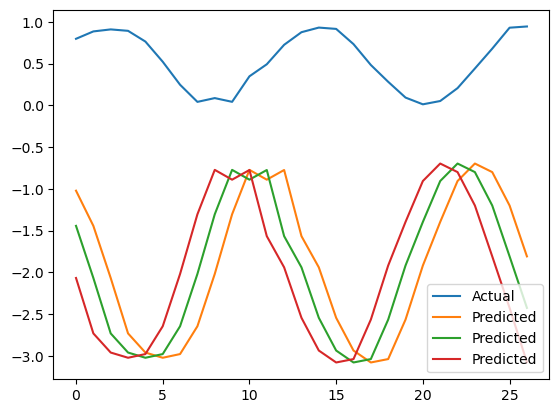

In [39]:
# build a transformer model (in progress, this keras version does not have a Transformer layer)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(time_steps, 1)),
    #tf.keras.layers.Transformer(num_layers=2, d_model=32, num_heads=2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

# train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    validation_split=0.1, verbose=1)

# make predictions on the test data
y_pred = model.predict(X_test)
y_pred=y_pred.squeeze()
# unscale the predicted and actual values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# plot the actual and predicted values
plt.plot(test_data[time_steps:], label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()
